https://www.kaggle.com/anikannal/solar-power-generation-data

Analysis Objective:  
Build and test a model that can predict AC Power given the input conditions at the plant.  

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.metrics import mean_squared_error , r2_score

In [23]:
from sklearn.model_selection import train_test_split , cross_val_score , KFold

In [24]:
from sklearn.preprocessing import StandardScaler

In [11]:
## read in the files
plant_1 = pd.read_csv("combined_df_1.csv")

In [13]:
plant_1.head()

,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,year,month,dayofweek,day,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15 00:00:00,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15 00:00:00,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15 00:00:00,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15 00:00:00,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15 00:00:00,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


Text(0.5, 1.0, 'PLANT 1')

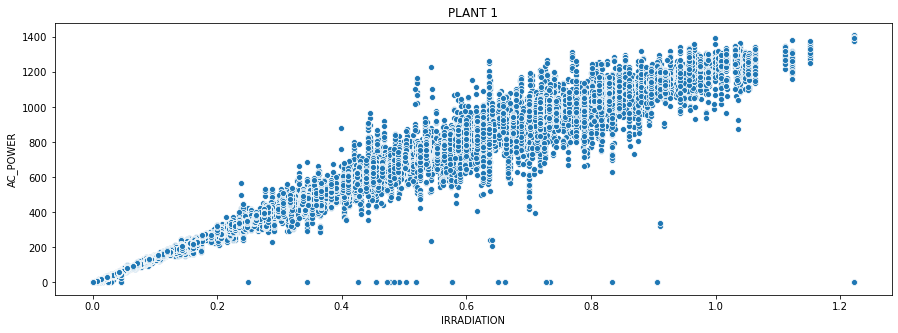

In [20]:
## Plot Irradiation Vs AC Power 
plt.figure(figsize = (15,5))
sns.scatterplot('IRRADIATION', 'AC_POWER', data = plant_1)
plt.title("PLANT 1")

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(plant_1['IRRADIATION'], plant_1['AC_POWER'] , random_state = 1 , test_size = 0.2)
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))



 X_train : (36544,)

 X_test : (9136,)

 y_train : (36544,)

 y_test : (9136,)


In [26]:
def perform_reg(model,X_train, X_test, y_train, y_test, cls = None):
    
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)   
    
    print("\n RMSE :{}".format(np.sqrt(mean_squared_error(y_test,pred_test))))
    print("\n train R2 :{}".format(r2_score(y_train,pred_train)))
    print("\n test R2 :{}".format(r2_score(y_test,pred_test)))
    if cls == 'dt':
        print("\n Max depth :{}".format(model.tree_.max_depth))
        

## Plot the predicted Vs actual values for training data 
    plt.figure(figsize = (8,6))
    plt.scatter(y_train, pred_train)
    plt.xlabel("actual")
    plt.ylabel('predicted')
    plt.title("Train data Vs Predicted")
    plt.show()

## Plot the predicted Vs actual values 
    plt.figure(figsize = (8,6))
    plt.scatter(y_test, pred_test)
    plt.title("Actual and Predicted values for Test data ")
    plt.xlabel("actual")
    plt.ylabel('predicted')
    plt.show()
    
## Plot the residual Vs actual values 
    plt.figure(figsize = (8,6))
    plt.scatter(y_test , (y_test - pred_test))
    plt.title("Residual Vs Actual values ")
    plt.xlabel("actual")
    plt.ylabel('residue')
    plt.show() 
    
## Plot Variable importance for decision tree , random forest
    if (cls == 'dt') | (cls == 'rf') | (cls == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,6))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)
        plt.show()

    
    return 


 RMSE :50.158020473169195

 train R2 :0.982210119000604

 test R2 :0.9841392388847892


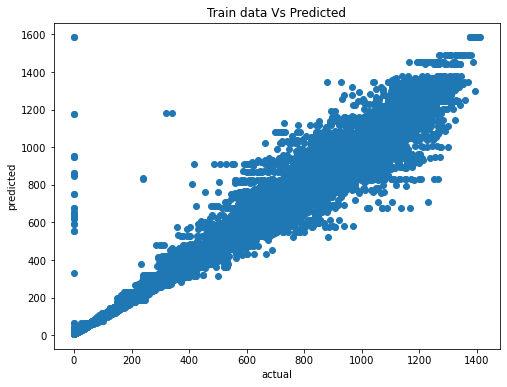

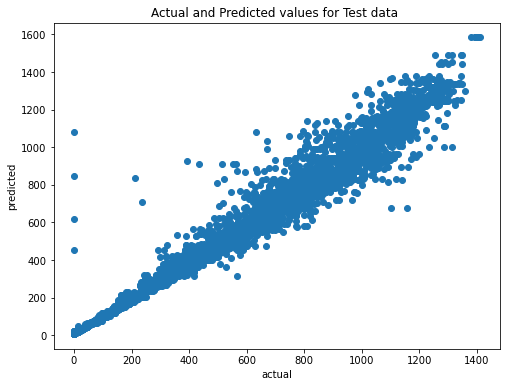

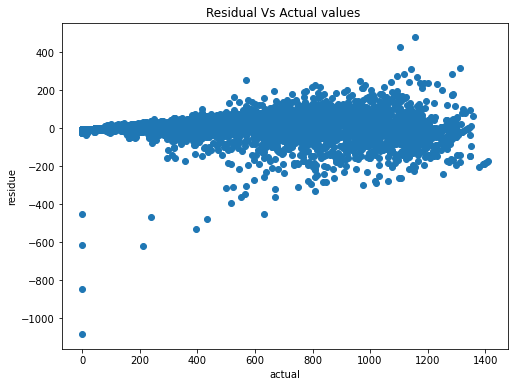

In [29]:
ln = LinearRegression()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

In [46]:
## Cross Validate with shuffling 

kf = KFold(n_splits = 5 , shuffle = True , random_state = 12)
model = LinearRegression()
#
predictors = plant_1.copy()
predictors = predictors['IRRADIATION'].values.reshape(-1,1)
cv = cross_val_score(estimator = model  , X=X_train , y=y_train, cv = kf , scoring = "r2")
print("\n 5 fold cross validation R2 :{}".format(cv))


 5 fold cross validation R2 :[0.98350899 0.97910228 0.98270795 0.98180999 0.98393828]


Check if we can predict AC Power with Temperature 

Text(0.5, 1.0, 'PLANT 1')

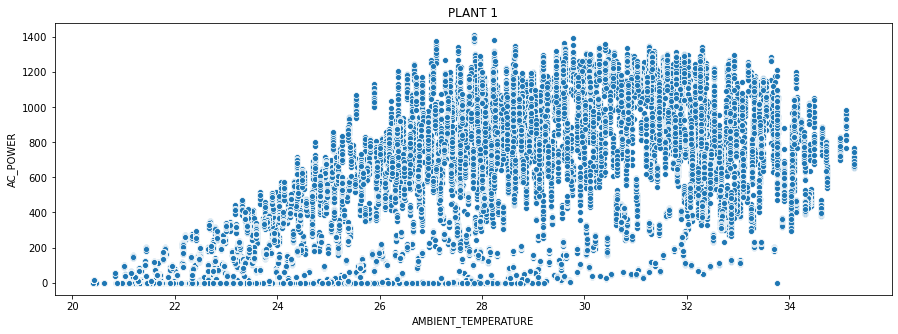

In [48]:
## Plot Temperature Vs AC Power 
plt.figure(figsize = (15,5))
sns.scatterplot('AMBIENT_TEMPERATURE', 'AC_POWER', data = plant_1)
plt.title("PLANT 1")

Text(0.5, 1.0, 'PLANT 1')

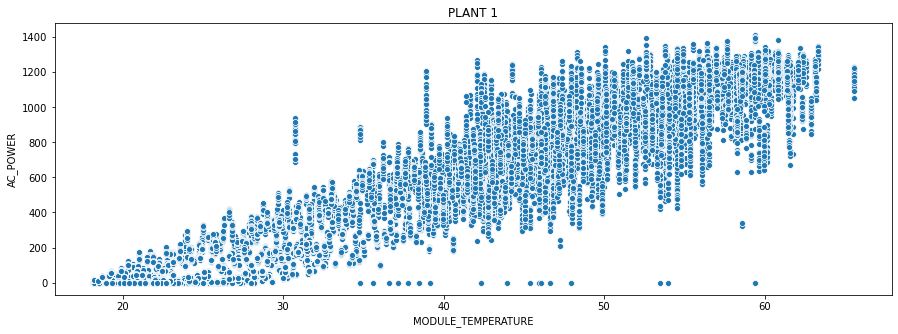

In [49]:
## Plot Irradiation Vs AC Power 
plt.figure(figsize = (15,5))
sns.scatterplot('MODULE_TEMPERATURE', 'AC_POWER', data = plant_1)
plt.title("PLANT 1")


 X_train : (36544,)

 X_test : (9136,)

 y_train : (36544,)

 y_test : (9136,)

 RMSE :117.31510571938257

 train R2 :0.9112679426800174

 test R2 :0.9132336916353829


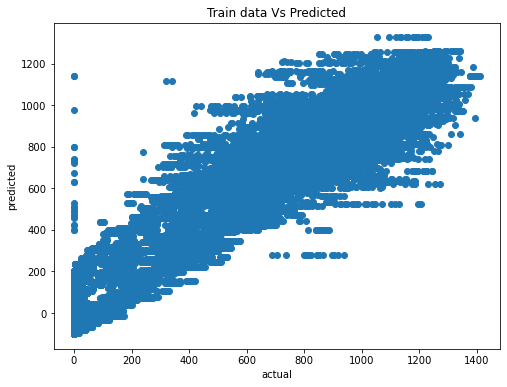

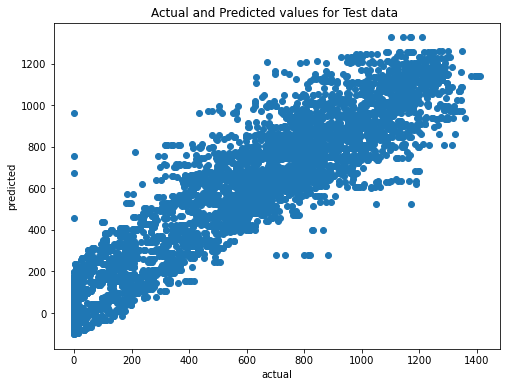

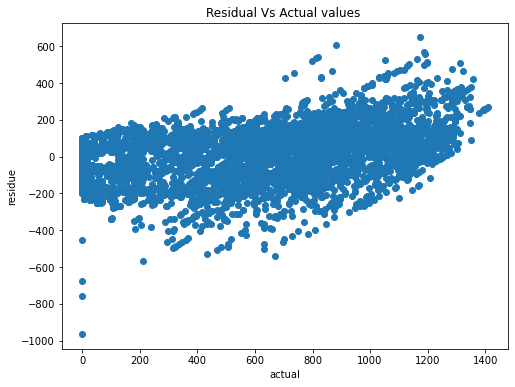

In [50]:
## Build a Linear Regression model with Module Temperature as the predictor. 
X_train, X_test, y_train, y_test  = train_test_split(plant_1['MODULE_TEMPERATURE'], plant_1['AC_POWER'] , random_state = 1 , test_size = 0.2)
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
ln = LinearRegression()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

In [51]:
plant_1.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999996,0.076710,0.004055,NaN,-0.042781,0.021528,0.049284,0.703796,0.954692,0.991305
AC_POWER,NaN,0.999996,1.000000,0.076628,0.004043,NaN,-0.042688,0.021513,0.049162,0.704035,0.954810,0.991260
DAILY_YIELD,NaN,0.076710,0.076628,1.000000,0.007277,NaN,-0.012850,0.051664,0.030742,0.489709,0.203702,0.071937
TOTAL_YIELD,NaN,0.004055,0.004043,0.007277,1.000000,NaN,0.167196,-0.011266,-0.053243,-0.036532,-0.014713,-0.004981
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,-0.042781,-0.042688,-0.012850,0.167196,NaN,1.000000,-0.042944,-0.678315,-0.237136,-0.116531,-0.051316
dayofweek,NaN,0.021528,0.021513,0.051664,-0.011266,NaN,-0.042944,1.000000,-0.012471,0.049433,0.029491,0.025254
day,NaN,0.049284,0.049162,0.030742,-0.053243,NaN,-0.678315,-0.012471,1.000000,0.164977,0.105859,0.056562
AMBIENT_TEMPERATURE,NaN,0.703796,0.704035,0.489709,-0.036532,NaN,-0.237136,0.049433,0.164977,1.000000,0.843456,0.702218


MODULE_TEMPERATURE as a predictor has slightly lower predictive power than IRRADIATION.  

Since IRRADIATION and MODULE_TEMPERATURE are highly correlated, they can not be together used a predictors in the linear regression model.  

Summary :  
Hence , as seen above , IRRADIATION values are good predictors of AC Power with an Error  of +- 50 Units when used in  a Linear Regression model.  